In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("6개항목전체_군구.csv", thousands = ',')
df

,시군구별,2021합계출산율,2021사회복지예산비중,2021인구천명당의료기관병상수,2021십만명당문화기반시설수,2021교원1인당학생수,2019GRDP
0,종로구,0.531,41.2,25.3,47.0,16.84,33780610
1,중구,0.634,40.5,10.5,24.5,17.77,53823217
2,용산구,0.664,49.9,4.0,7.6,14.13,12695516
3,성동구,0.764,43.9,6.6,5.2,16.41,12167850
4,광진구,0.525,54.2,7.7,3.2,20.21,6587069
...,...,...,...,...,...,...,...
223,산청군,0.992,21.1,5.2,34.9,6.02,1056199
224,함양군,0.886,21.2,4.2,10.4,7.46,1051194
225,거창군,0.920,21.0,13.6,9.8,11.99,1599712
226,합천군,0.805,21.1,20.2,14.0,5.37,1125887


In [2]:
cc = df[['2021합계출산율', '2021사회복지예산비중', '2021인구천명당의료기관병상수', '2021십만명당문화기반시설수', '2021교원1인당학생수', '2019GRDP']]
cc.head()

,2021합계출산율,2021사회복지예산비중,2021인구천명당의료기관병상수,2021십만명당문화기반시설수,2021교원1인당학생수,2019GRDP
0,0.531,41.2,25.3,47.0,16.84,33780610
1,0.634,40.5,10.5,24.5,17.77,53823217
2,0.664,49.9,4.0,7.6,14.13,12695516
3,0.764,43.9,6.6,5.2,16.41,12167850
4,0.525,54.2,7.7,3.2,20.21,6587069


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
cc_scaled = sc.fit_transform(cc)
pd.DataFrame(cc_scaled) #mean~min, mem_period 5개 변수가 표준화됨.

,0,1,2,3,4,5
0,-1.650443,0.285853,1.026019,3.356878,1.043324,1.958737
1,-1.197503,0.239295,-0.503694,1.217225,1.259816,3.527010
2,-1.065579,0.864502,-1.175527,-0.389892,0.412472,0.308894
3,-0.625831,0.465434,-0.906794,-0.618122,0.943226,0.267605
4,-1.676828,1.150501,-0.793099,-0.808313,1.827816,-0.169074
...,...,...,...,...,...,...
223,0.376795,-1.051025,-1.051496,2.206220,-1.475430,-0.601847
224,-0.089338,-1.044374,-1.154855,-0.123624,-1.140217,-0.602239
225,0.060176,-1.057677,-0.183281,-0.180682,-0.085692,-0.559319
226,-0.445534,-1.051025,0.498888,0.218720,-1.626741,-0.596394


In [4]:
#cc_scaled 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(cc_scaled)

#클러스터링 변수인 clusters 값을 원본 데이터인 'cc'내에 넣기 
cc['cluster'] = clusters.labels_
cc.head()

C:\Users\최유진\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,2021합계출산율,2021사회복지예산비중,2021인구천명당의료기관병상수,2021십만명당문화기반시설수,2021교원1인당학생수,2019GRDP,cluster
0,0.531,41.2,25.3,47.0,16.84,33780610,2
1,0.634,40.5,10.5,24.5,17.77,53823217,0
2,0.664,49.9,4.0,7.6,14.13,12695516,0
3,0.764,43.9,6.6,5.2,16.41,12167850,0
4,0.525,54.2,7.7,3.2,20.21,6587069,0


In [5]:
#cluster를 기준으로 데이터 개수 세기
cc.groupby('cluster').count()

,2021합계출산율,2021사회복지예산비중,2021인구천명당의료기관병상수,2021십만명당문화기반시설수,2021교원1인당학생수,2019GRDP
cluster,,,,,,
0,120,120,120,120,120,120
1,84,84,84,84,84,84
2,24,24,24,24,24,24


In [6]:
#그룹별 특징 -그룹별 평균값
cc.groupby('cluster').mean()

,2021합계출산율,2021사회복지예산비중,2021인구천명당의료기관병상수,2021십만명당문화기반시설수,2021교원1인당학생수,2019GRDP
cluster,,,,,,
0,0.812025,47.465833,13.609167,5.176667,15.218000,1.419044e+07
1,1.064857,22.700000,12.242857,20.194048,8.322976,2.078145e+06
2,0.822875,33.791667,35.150000,14.587500,12.181667,4.878782e+06


In [7]:
from sklearn.decomposition import PCA
X = cc_scaled.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-3.81851023e-01,  3.10115098e-01],
       [-1.69321086e+00, -1.84847258e+00],
       [-1.30851752e+00, -8.96234785e-01],
       [-1.29280052e+00, -7.91638872e-01],
       [-2.47861025e+00, -2.73098789e-01],
       [-2.31477004e+00,  2.32005354e-01],
       [-1.83494420e+00, -1.35154504e-01],
       [-1.96308336e+00, -3.55781678e-01],
       [-1.63927699e+00, -5.25482437e-02],
       [-1.29247088e+00, -1.52184491e-01],
       [-1.91321412e+00, -4.35459392e-01],
       [-1.42543064e+00, -1.76693694e-01],
       [-2.02909050e+00,  1.46574389e-02],
       [-2.56403950e+00, -1.20180612e+00],
       [-1.30893658e+00, -4.36918827e-01],
       [-2.11602292e+00, -5.40436114e-01],
       [-1.60859805e+00, -3.23210534e-01],
       [-1.41127928e+00, -5.18216196e-01],
       [-1.98679864e+00, -6.32797390e-01],
       [-2.17377519e+00, -3.90480317e-01],
       [-1.91736988e+00, -2.74766901e-01],
       [-1.65249390e+00, -1.25164006e+00],
       [-2.63071408e+00, -1.84020629e+00],
       [-2.

In [8]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = cc['cluster'] 
pca_df.head()

,0,1,cluster
0,-0.381851,0.310115,2
1,-1.693211,-1.848473,0
2,-1.308518,-0.896235,0
3,-1.292801,-0.791639,0
4,-2.478610,-0.273099,0


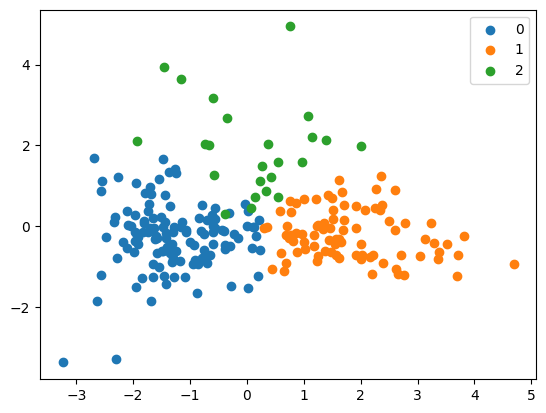

In [9]:
for i in sorted(pca_df['cluster'].unique()):
    tmp = pca_df.loc[pca_df['cluster'] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster'].unique()))

In [10]:
print("클러스터 레이블 확인 : \n {}".format(kmeans.labels_))

클러스터 레이블 확인 : 
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 2 1 1 0 2 1 0 0 2 0 1 1 1 1 1 0
 1 1 0 0 0 1 1 2 2 1 1 1 1 1 1 1 2 0 0 2 1 2 1 1 1 2 2 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 2 0 2 1 1 1 0 1 1 1 1 1 2 1 1 0 1 1 1 1 0 0 2 0 1 0 0 0 1 2 2 1 1
 1 1 1 1 1 0]


In [11]:
cc.to_csv("C:/final/클러스터최종값.csv", index=False)